In [1]:
station_name = "Vienna"
iterations = 500000
mask_years = [2019]
measurements_folder = f"./measurements/{station_name.capitalize()}"
station_name = station_name + "_mask-" + "-".join([str(year) for year in mask_years])


In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import tempfile
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from utils.utils import pretty_lat, pretty_lon, ProgressStatus, plot_n_steps_of_area_from_nc_file

In [3]:
from station.data_submission import DataSubmission


from train_station_twin.training_executer import TrainingExecuter
%matplotlib inline
from utils.utils import plot_measurements_df


Extracting Vienna_mask-2019...


100%|██████████| 1857/1857 [02:16<00:00, 13.59it/s]


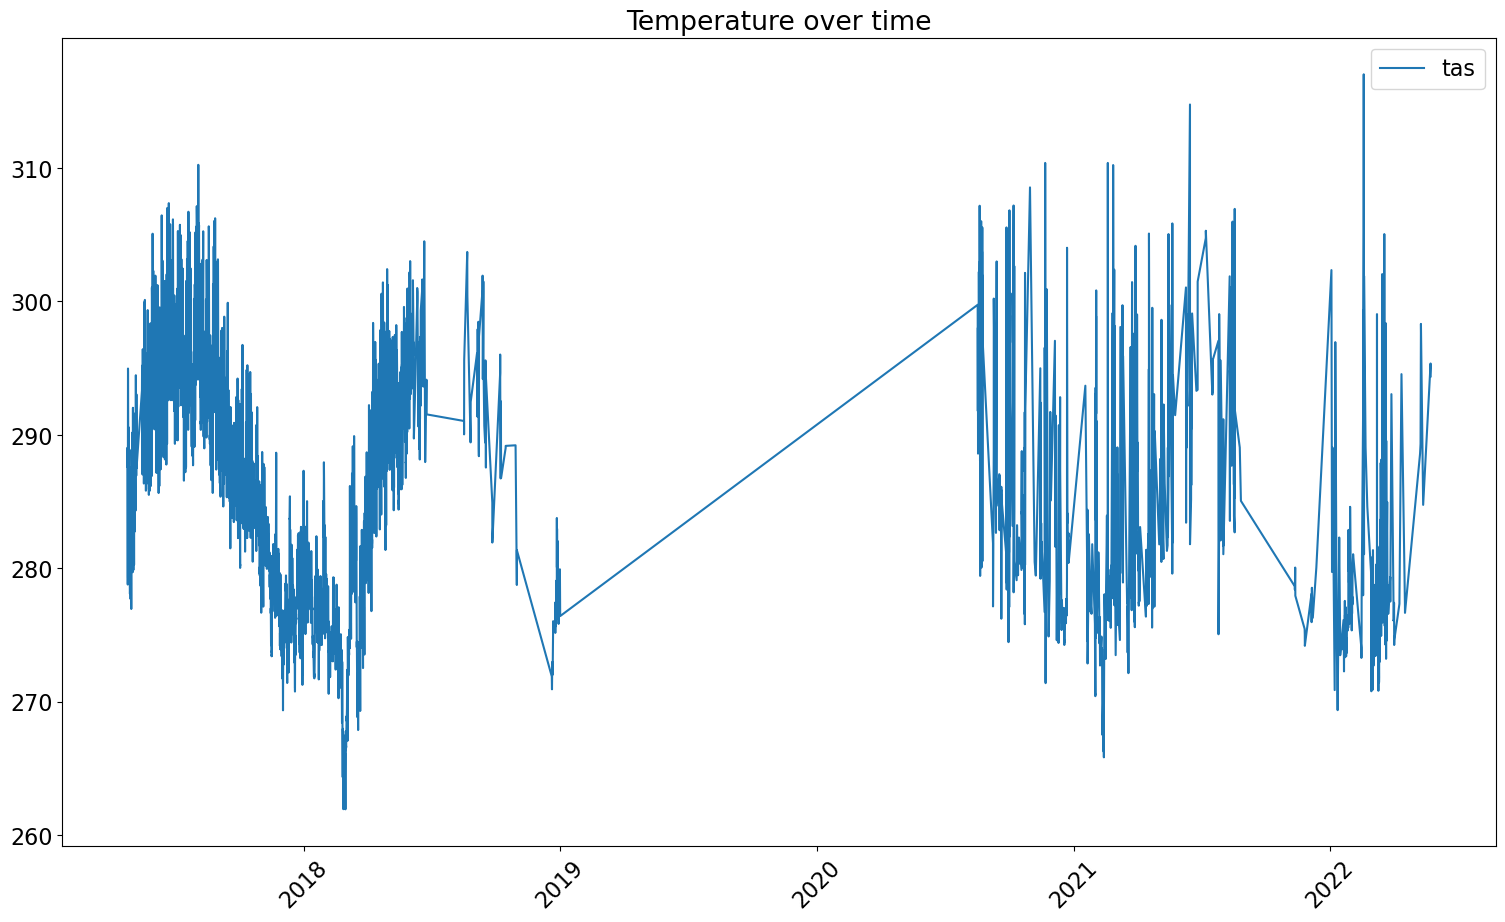

In [4]:
station_submission = DataSubmission(name=station_name, mask_years=mask_years)
station_submission.measurement_dir_path = measurements_folder

station_submission.initialize_station()
plot_measurements_df(station_submission.station.df)

In [5]:
training = TrainingExecuter(
    station = station_submission.station,
    progress = station_submission.progress,
    iterations = iterations,
    local = True,
)
job_id = training.execute_with_sbatch()

(11632,)
Saving to ./executed_trainings/Vienna_mask-2019_20240506-0346/target_jung1y52/train/vienna_mask-2019.nc


2024-05-06 03:46:18,602 INFO Welcome to the CDS
2024-05-06 03:46:18,602 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-06 03:46:18,726 INFO Request is completed
2024-05-06 03:46:18,726 INFO Downloading https://download-0010-clone.copernicus-climate.eu/cache-compute-0010/cache/data6/adaptor.mars.internal-1714953302.4593346-31430-7-463e7e74-e570-4a8d-a975-98017ed6cfd3.grib to /tmp/tmp2wxhn4_0/2017_4-12.grib (1.7M)
  0%|          | 0.00/1.70M [00:00<?, ?B/s]

2024-05-06 03:46:19,245 INFO Download rate 3.3M/s   
2024-05-06 03:46:19,338 INFO Welcome to the CDS
2024-05-06 03:46:19,339 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-06 03:46:19,425 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data1/adaptor.mars.internal-1714953694.7750046-22516-7-a54d03e3-a46f-432d-8801-e9d00e460a8b.grib to /tmp/tmp2wxhn4_0/2018.grib (2.3M)


2024-05-06 03:46:19,910 INFO Download rate 4.7M/s   
2024-05-06 03:46:20,001 INFO Welcome to the CDS
2024-05-06 03:46:20,002 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-06 03:46:20,170 INFO Downloading https://download-0019.copernicus-climate.eu/cache-compute-0019/cache/data3/adaptor.mars.internal-1714954194.5894334-25810-14-a7ec2448-4ca2-4236-a347-4dd37440a56c.grib to /tmp/tmp2wxhn4_0/2020_8-12.grib (968.2K)
2024-05-06 03:46:20,708 INFO Download rate 1.8M/s 
2024-05-06 03:46:20,800 INFO Welcome to the CDS
2024-05-06 03:46:20,801 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-05-06 03:46:20,909 INFO Downloading https://download-0011-clone.copernicus-climate.eu/cache-compute-0011/cache/data6/adaptor.mars.internal-1714954453.8817785-9518-1-4b099575-d4da-4340-b991-79cd2d62930e.grib to /tmp/tmp2wxhn4_0/2021.grib (2.3M)


2024-05-06 03:46:21,549 INFO Download rate 3.5M/s   
2024-05-06 03:46:21,644 INFO Welcome to the CDS
2024-05-06 03:46:21,645 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels


2024-05-06 03:46:21,846 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.internal-1714954833.4718668-22668-6-837fd1e3-853f-4b45-98d7-f6ad60f4f089.grib to /tmp/tmp2wxhn4_0/2022_1-5.grib (955.5K)
2024-05-06 03:46:22,347 INFO Download rate 1.9M/s 


Found 2022_1-5.grib
Renamed variable var167 to tas in /tmp/tmpxehtz729/2022_1-5.nc
Found 2020_8-12.grib
Renamed variable var167 to tas in /tmp/tmpxehtz729/2020_8-12.nc
Found 2017_4-12.grib
Renamed variable var167 to tas in /tmp/tmpxehtz729/2017_4-12.nc
Found 2018.grib
Renamed variable var167 to tas in /tmp/tmpxehtz729/2018.nc
Found 2021.grib
Renamed variable var167 to tas in /tmp/tmpxehtz729/2021.nc
Found 2017_4-12.nc
Found 2021.nc
Found 2018.nc
Found 2022_1-5.nc
Found 2020_8-12.nc
Merged era5 file saved into ./executed_trainings/Vienna_mask-2019_20240506-0346/temp_n3_o6g6n/era5_merged.nc
Lat:  48.2303
Lon:  16.3609
nearest_lat_idx: 5 [49.231    48.980875 48.73075  48.480625 48.2305   47.980375 47.73025
 47.480125 47.23    ]
nearest_lon_idx: 5 [15.36 15.61 15.86 16.11 16.36 16.61 16.86 17.11 17.36]
nearest_lat: 47.980375
nearest_lon: 16.61
nearest lon is bigger
nearest lat is smaller
crop_lon_idx_min: 1
crop_lon_idx_max: 8
crop_lat_idx_min: 1
crop_lat_idx_max: 8
Lon values after croppi

In [6]:
print(f"Job ID: {job_id}")
print(f"tail -f {training.temp_dir.name}/slurm_logs/crai_crai-train_{job_id}.log")

Job ID: 10179444
tail -f ./executed_trainings/Vienna_mask-2019_20240506-0346/temp_n3_o6g6n/slurm_logs/crai_crai-train_10179444.log
